In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

# Kfold 
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing

# For optimizing hyper parameters
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from bayes_opt import BayesianOptimization

# For selecting features
import shap

# For creating loading bars and measuring time
from tqdm.notebook import tqdm
import time

# Statistical distributions
from scipy import stats

In [2]:
# Cheking the version of numpy
print(np.__version__)

1.26.4


## Reading data

In [3]:
path = '/Users/ChamillaTerp/Dropbox/Skole/Master/Applied Machine Learning/AppliedML2025/Initial project'

def load_csv_data(name):
    return pd.read_csv(f'{path}/{name}')

training = load_csv_data('AppML_InitialProject_train.csv')
test_class = load_csv_data('AppML_InitialProject_test_classification.csv')
test_reg = load_csv_data('AppML_InitialProject_test_regression.csv')

print(f'Shape of training dataset: {training.shape}')
print(f'Shape of test classification dataset: {test_class.shape}')
print(f'Shape of test regression dataset: {test_reg.shape}')

Shape of training dataset: (180000, 142)
Shape of test classification dataset: (60000, 140)
Shape of test regression dataset: (40000, 140)


In [4]:
# Defining variables 
all_variables = ['averageInteractionsPerCrossing', 'p_Rhad1', 'p_Rhad', 'p_f3', 'p_weta2', 'p_Rphi', 'p_Reta', 'p_Eratio', 'p_f1', 'p_TRTPID', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_TRTTrackOccupancy', 'p_numberOfTRTXenonHits', 'p_z0', 'p_d0', 'p_sigmad0', 'p_dPOverP', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_etcone20', 'p_etcone30', 'p_etcone40', 'p_ptcone20', 'p_ptcone30', 'p_ptcone40', 'p_ptPU30', 'p_vertex', 'pX_E7x7_Lr2', 'pX_E7x7_Lr3', 'pX_E_Lr0_HiG', 'pX_E_Lr0_MedG', 'pX_E_Lr1_HiG', 'pX_E_Lr1_LowG', 'pX_E_Lr1_MedG', 'pX_E_Lr2_HiG', 'pX_E_Lr2_LowG', 'pX_E_Lr2_MedG', 'pX_E_Lr3_HiG', 'pX_E_Lr3_MedG', 'pX_MultiLepton', 'pX_OQ', 'pX_ambiguityType', 'pX_asy1', 'pX_author', 'pX_barys1', 'pX_core57cellsEnergyCorrection', 'pX_deltaEta0', 'pX_deltaEta1', 'pX_deltaEta2', 'pX_deltaEta3', 'pX_deltaPhi0', 'pX_deltaPhi1', 'pX_deltaPhi2', 'pX_deltaPhi3', 'pX_deltaPhiFromLastMeasurement', 'pX_deltaPhiRescaled0', 'pX_deltaPhiRescaled1', 'pX_deltaPhiRescaled3', 'pX_e1152', 'pX_e132', 'pX_e235', 'pX_e255', 'pX_e2ts1', 'pX_ecore', 'pX_emins1', 'pX_etcone20', 'pX_etcone30', 'pX_etcone40', 'pX_f1core', 'pX_f3core', 'pX_maxEcell_energy', 'pX_maxEcell_gain', 'pX_maxEcell_time', 'pX_maxEcell_x', 'pX_maxEcell_y', 'pX_maxEcell_z', 'pX_nCells_Lr0_HiG', 'pX_nCells_Lr0_MedG', 'pX_nCells_Lr1_HiG', 'pX_nCells_Lr1_LowG', 'pX_nCells_Lr1_MedG', 'pX_nCells_Lr2_HiG', 'pX_nCells_Lr2_LowG', 'pX_nCells_Lr2_MedG', 'pX_nCells_Lr3_HiG', 'pX_nCells_Lr3_MedG', 'pX_neflowisol20', 'pX_neflowisol30', 'pX_neflowisol40', 'pX_neflowisolcoreConeEnergyCorrection', 'pX_pos', 'pX_pos7', 'pX_poscs1', 'pX_poscs2', 'pX_ptcone20', 'pX_ptcone30', 'pX_ptcone40', 'pX_ptconecoreTrackPtrCorrection', 'pX_ptvarcone20', 'pX_ptvarcone30', 'pX_ptvarcone40', 'pX_r33over37allcalo', 'pX_topoetcone20', 'pX_topoetcone20ptCorrection', 'pX_topoetcone30', 'pX_topoetcone30ptCorrection', 'pX_topoetcone40', 'pX_topoetcone40ptCorrection', 'pX_topoetconecoreConeEnergyCorrection', 'pX_weta1', 'pX_widths1', 'pX_wtots1', 'pX_e233', 'pX_e237', 'pX_e2tsts1', 'pX_ehad1', 'pX_emaxs1', 'pX_fracs1', 'pX_DeltaE', 'pX_E3x5_Lr0', 'pX_E3x5_Lr1', 'pX_E3x5_Lr2', 'pX_E3x5_Lr3', 'pX_E5x7_Lr0', 'pX_E5x7_Lr1', 'pX_E5x7_Lr2', 'pX_E5x7_Lr3', 'pX_E7x11_Lr0', 'pX_E7x11_Lr1', 'pX_E7x11_Lr2', 'pX_E7x11_Lr3', 'pX_E7x7_Lr0', 'pX_E7x7_Lr1', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge']
print(f'Number of features: {len(all_variables)}')

Number of features: 140


In [5]:
# Defining training and test set
X_train_unscaled = training[all_variables]
y_truth_e = training['p_Truth_isElectron']
y_truth_energy = training['p_Truth_Energy']

# Test sample
X_test_unscaled = test_reg[all_variables]

print(f'Shape of unscaled training dataset: {X_train_unscaled.shape}')
print(f'Shape of y_truth_e: {y_truth_e.shape}')
print(f'Shape of y_truth_energy: {y_truth_energy.shape}')
print(f'Shape of unscaled test dataset: {X_test_unscaled.shape}')

Shape of unscaled training dataset: (180000, 140)
Shape of y_truth_e: (180000,)
Shape of y_truth_energy: (180000,)
Shape of unscaled test dataset: (40000, 140)


In [6]:
# Scaling the data - improves performance of the model
# First getting data that ONLY contains electrons
mask = (y_truth_e == True)
X_train_electron = X_train_unscaled[mask]                       # This is the training data with only electrons
y_truth_energy_electron = y_truth_energy[mask]                  # This is the target variable with only electrons
print(f'Shape of training dataset with only electrons: {X_train_electron.shape}')
print(f'Shape of target variable with only electrons: {y_truth_energy_electron.shape}')

# Scaling data to improve performance
scaler = preprocessing.StandardScaler().fit(X_train_electron)
X_train_scaled = scaler.transform(X_train_electron)
X_test_scaled = scaler.transform(X_test_unscaled)

print(f'Shape of scaled training dataset: {X_train_scaled.shape}')
print(f'Shape of scaled test dataset: {X_test_scaled.shape}')

Shape of training dataset with only electrons: (37800, 140)
Shape of target variable with only electrons: (37800,)
Shape of scaled training dataset: (37800, 140)
Shape of scaled test dataset: (40000, 140)


### XGBoost
## Finding most important features - choosing 15 parameters (using SHAP values)

In [7]:
# Splitting data into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_truth_energy_electron, test_size = 0.3, random_state = 42)

# Training model
model = xgb.XGBRegressor(
    n_estimators = 500,
    learning_rate = 0.05,
    eval_metric = 'mae',                # Mean Absolute Error
    max_depth = 10,
    random_state = 42
    )

# Fitting the model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

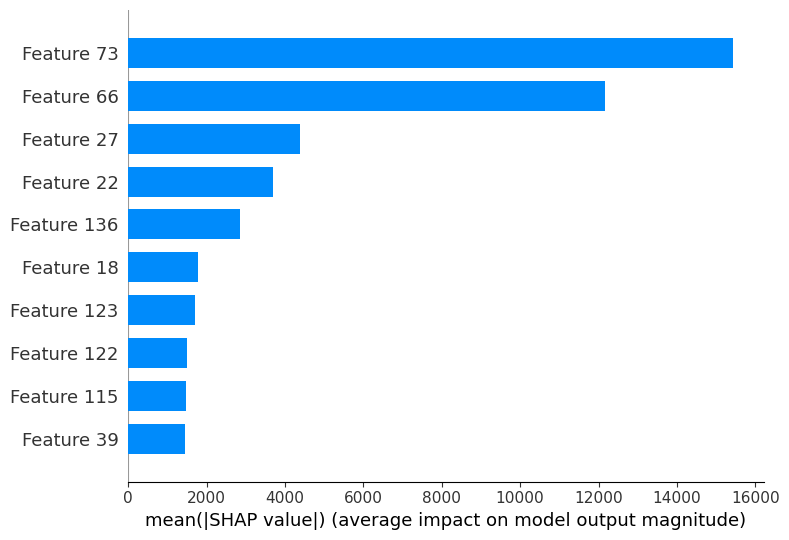

In [8]:
# Running SHAP 
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# Plotting SHAP values in a bar plot
shap.summary_plot(shap_values, X_val, plot_type="bar", max_display=10)

In [9]:
mean_shap_values = np.abs(shap_values.values).mean(axis = 0)
sorted_indicies = np.argsort(mean_shap_values)
sorted_shap = mean_shap_values[sorted_indicies][-15:][::-1]                   # This gets the top 15 features
sorted_shap_names = np.array(all_variables)[sorted_indicies][-15:][::-1]      # This gets the names of the top 15 features

# Printing the top 15 features using Pandas
print('--------- Top 15 features ---------')
top_15_features = pd.Series(sorted_shap, index = sorted_shap_names)
display(top_15_features)

--------- Top 15 features ---------


pX_maxEcell_energy    15439.056641
pX_ecore              12168.624023
p_ptcone40             4374.673828
p_etcone20             3691.242920
p_pt_track             2856.049561
p_sigmad0              1773.223389
pX_E3x5_Lr1            1698.317871
pX_E3x5_Lr0            1503.280396
pX_e233                1469.977417
pX_E_Lr2_MedG          1449.856079
pX_MultiLepton         1438.347656
pX_E_Lr0_HiG           1281.000488
pX_etcone20            1026.367676
pX_topoetcone20        1004.773743
pX_f1core               993.710815
dtype: float32

In [11]:
# Choosing how many parameters to include based on ACCURACY and COMPUTING TIME
# Choosing which parameters to include in the model
N = [5, 10, 12, 15, 20, 22, 25]                                     # Number of parameters to test

accuracy = []                                                       # List to store accuracy
computing_time = []                                                 # List to store computing time

# Making the training data a Pandas DataFrame to easily access the columns
X_dataframe = pd.DataFrame((X_train_scaled), columns = all_variables)

# Looping through the number of parameters
for n in tqdm(N):

    # Selecting the top n features
    X_features_n = X_dataframe[sorted_shap_names[:n]]

    # Splitting the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_features_n, y_truth_energy_electron, test_size = 0.2, random_state = 42)

    # Fitting the model and timing it 
    start = time.time()
    model = xgb.XGBRegressor(
        n_estimators = 500,
        learning_rate = 0.05,
        eval_metric = 'mae',                
        max_depth = 10,
        random_state = 42
    )
    model.fit(X_train, y_train)                                                
    end = time.time()

    computing_time.append(end - start)                                              

    # Getting the accuracy as the MAE 
    mae = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'neg_mean_absolute_error')     # Getting the MAE
    accuracy.append(abs(mae.mean()))                                                                # Getting the mean of the MAE and appending to store


  0%|          | 0/7 [00:00<?, ?it/s]

Text(0.5, 0, 'Computing time (s)')

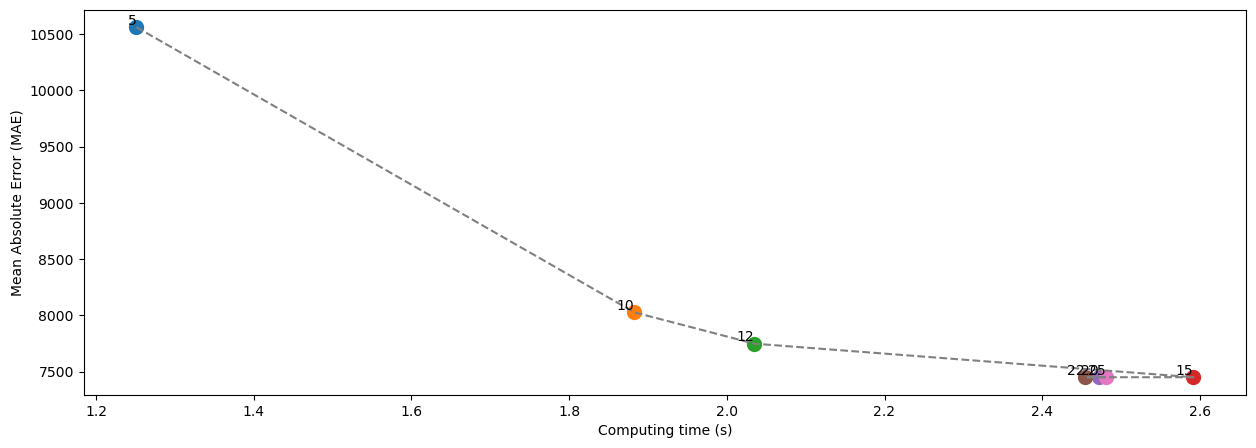

In [12]:
# Plotting result
fig, ax = plt.subplots(figsize = (15, 5))

ax.plot(computing_time, accuracy, linestyle = '--', color = 'grey')

# Adding labels to the points
for i, txt in enumerate(N):
    ax.scatter(computing_time[i], accuracy[i], s = 100, label = f'n = {txt}')
    ax.annotate(txt, (computing_time[i], accuracy[i]), fontsize = 10, ha = 'right', va = 'bottom')

ax.set_ylabel('Mean Absolute Error (MAE)')
ax.set_xlabel('Computing time (s)')

In [13]:
# Creating the data that will be used for the rest of the analysis - i.e. with n features
n = 12
dF = pd.DataFrame(X_train_scaled, columns = all_variables)             # Making the training data a Pandas DataFrame to easily access the columns
X_train_scaled = dF[sorted_shap_names[:n]]                             # Selecting the top n features

dF = pd.DataFrame(X_test_scaled, columns = all_variables)              # Making the test data a Pandas DataFrame to easily access the columns
X_test_scaled = dF[sorted_shap_names[:n]]                             # Selecting the top n features

## Choosing hyperparameters (optimizing)
### Random search based on 5 fold

In [14]:
# Hyperparameters to optimize
params = {'n_estimators': stats.randint(1, 400), 'max_depth': stats.randint(1, 20), 'learning_rate': stats.uniform(0.01, 0.5)}

iterations = 10
folds = 5

# Model configuration - to optimize
model = xgb.XGBRegressor(
    n_estimators = 500,
    learning_rate = 0.05,
    eval_metric = 'mae',                
    max_depth = 5,
    random_state = 42
)

RandomSearch = RandomizedSearchCV(
    model,
    params,
    n_iter = iterations,
    cv = folds,
    scoring = 'neg_mean_absolute_error',
    random_state = 42
)

# Fitting random search
RandomSearch.fit(X_train_scaled, y_truth_energy_electron); 

In [15]:
# Priting the best parameters
print('Best parameters:')
print(RandomSearch.best_params_)
print('Best score:')
print(abs(RandomSearch.best_score_))                

Best parameters:
{'learning_rate': 0.08799726016810132, 'max_depth': 11, 'n_estimators': 88}
Best score:
7791.251251034451


## Creating final model

In [16]:
# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_truth_energy_electron, test_size = 0.2, random_state = 42)

In [17]:
# Setting up model with best parameters and fitting it
model = xgb.XGBRegressor(
    n_estimators = RandomSearch.best_params_['n_estimators'],
    learning_rate = RandomSearch.best_params_['learning_rate'],
    eval_metric = 'mae',                
    max_depth = RandomSearch.best_params_['max_depth'],
    random_state = 42
)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08799726016810132,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=88, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [18]:
# Evaluating the MAE 
mae = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'neg_mean_absolute_error')     # Getting the MAE
print('Mean Absolute Error (MAE):')
print(abs(mae.mean()))                                                                          # High value is bad, low value is good

Mean Absolute Error (MAE):
7793.7691811142995


In [19]:
# Making predictions on the validation set
y_val_pred = model.predict(X_val)

Text(0, 0.5, 'Energy (GeV)')

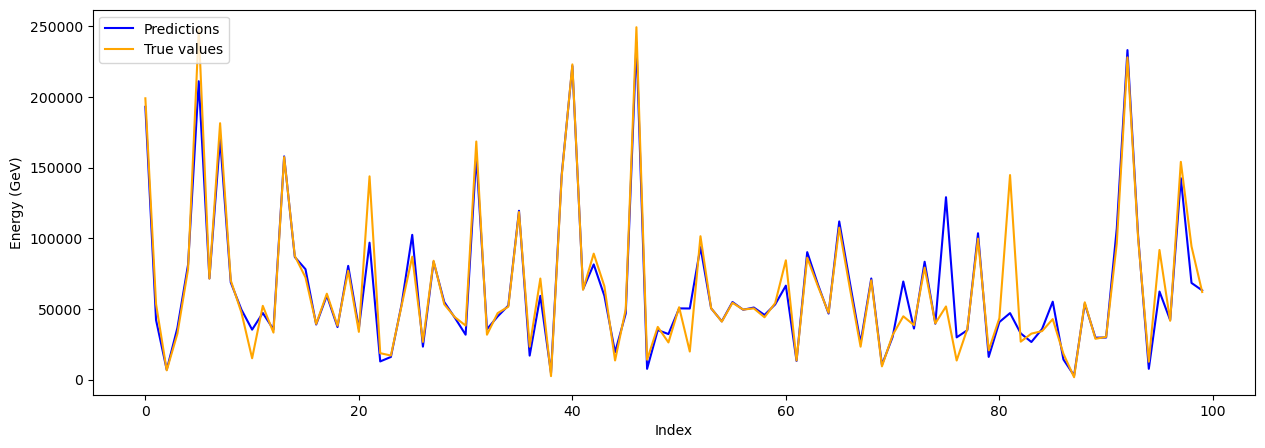

In [20]:
# Plotting the first 100 predictions to see how well the model performs
plt.figure(figsize = (15, 5))

x_values = np.arange(100)
plt.plot(x_values, y_val_pred[:100], label = 'Predictions', color = 'blue')
plt.plot(x_values, y_val[:100], label = 'True values', color = 'orange')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Energy (GeV)')

<b>Note:</b> Seems okay! 

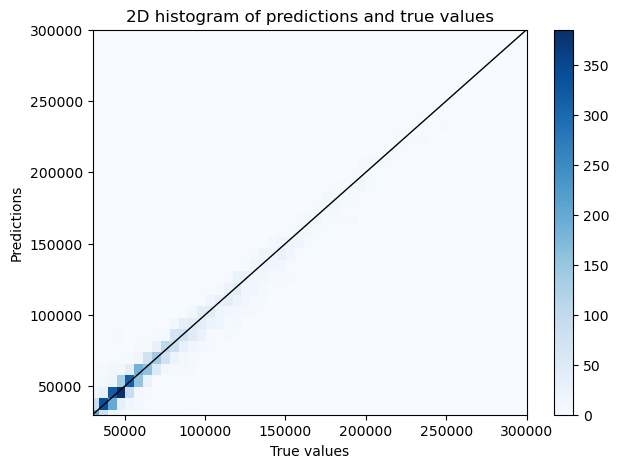

In [21]:
# Plotting a 2D histogram of the predictions and true values
plt.figure(figsize = (7, 5))

plt.hist2d(y_val, y_val_pred, bins = 100, cmap = 'Blues')
plt.colorbar()
plt.ylim(30000, 300000)
plt.xlim(30000, 300000)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.title('2D histogram of predictions and true values')

# Plot desired line
plt.plot((30000, 300000), (30000, 300000), color='black', linewidth=1)

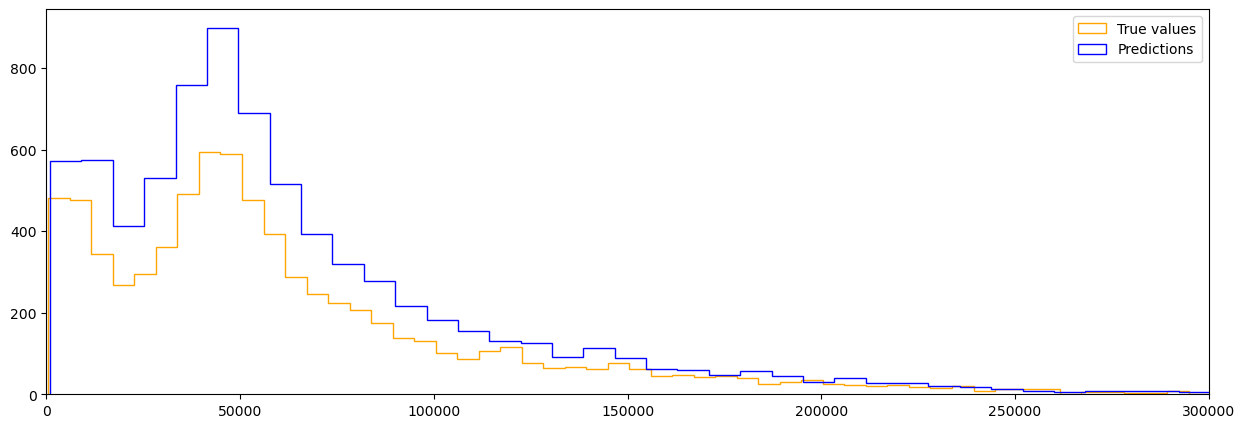

In [22]:
# Looking at the 1D distribution 
plt.figure(figsize = (15, 5))

plt.hist(y_val, bins = 100, label = 'True values', color = 'orange', histtype = 'step')
plt.hist(y_val_pred, bins = 100, label = 'Predictions', color = 'blue', histtype = 'step')
plt.xlim(0, 300000)
plt.legend()

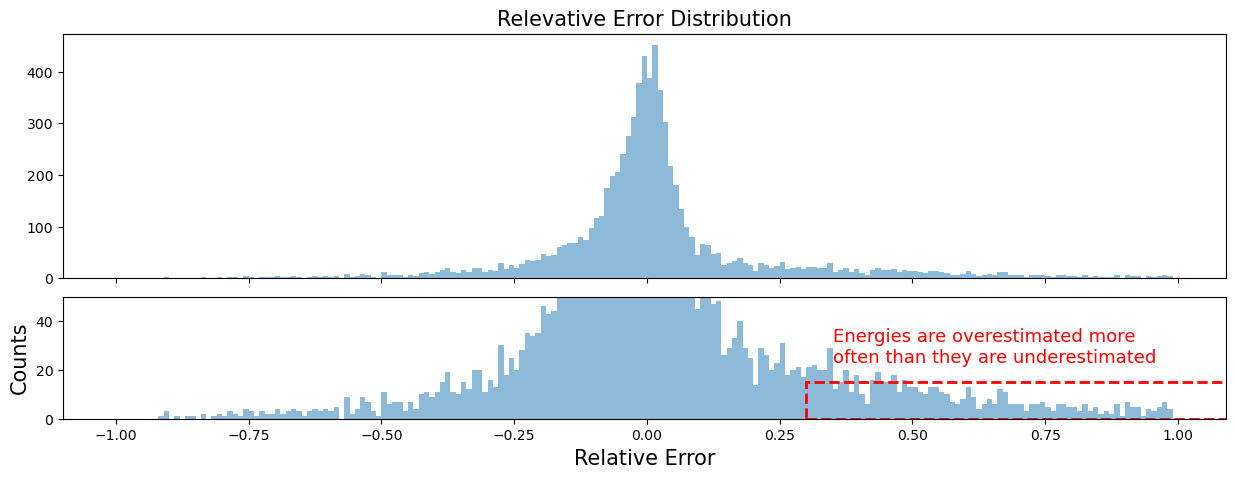

Mean relative error: 0.18667524669437424 ± 1.372619503786827


In [25]:
# Plotting the relative error distribution
relative_error = (y_val_pred - y_val) / y_val

fig, ax = plt.subplots(nrows = 2, figsize = (15, 5), gridspec_kw = {'height_ratios': (2, 1), 'hspace': 0.1}, sharex = True)
bins = np.arange(-1, 1, 0.01)

ax[0].hist(relative_error, range = (-5,5), bins = bins, alpha = 0.5)
ax[0].set_title('Relevative Error Distribution',fontsize = 15)

# Plot zoom
ax[1].hist(relative_error, range = (-5,5), bins = bins, alpha = 0.5)
ax[1].set_ylim(0, 50)

# Mark left tail
rect = patches.Rectangle((0.3,0), 0.8, 15, linewidth = 2, edgecolor = 'r', facecolor = 'none', linestyle = 'dashed')
ax[1].add_patch(rect)
ax[1].text(0.35, 23, 'Energies are overestimated more \noften than they are underestimated', color = 'r', fontsize = 13)

ax[1].set_xlabel('Relative Error', fontsize = 15)
ax[1].set_ylabel('Counts', fontsize = 15)

plt.show()

# Printing the mean and standard deviation of the relative error
mean_relative_error = np.mean(relative_error)
std_relative_error = np.std(relative_error)

print(f'Mean relative error:', mean_relative_error, '±', std_relative_error)

In [24]:
# Making predictions and creating final file
final_predictions = model.predict(X_test_scaled)

# Creating a DataFrame with the predictions
final_df = pd.DataFrame(final_predictions, columns = ['energy_GeV'])

path = '/Users/ChamillaTerp/Dropbox/Skole/Master/Applied Machine Learning/AppliedML2025/Initial project/Initial Project Solutions/Regression'
# Saving the DataFrame to a .txt file
final_df.to_csv(f'{path}/Regression_ChamillaTerp_XGBoostRegressor.txt', index = True, header = None, sep = ',', mode = 'w')

# Making file with the parameters used 
file_name = 'Regression_ChamillaTerp_XGBoostRegressor_VariableList.txt'

outfile = open(f'{path}/{file_name}', 'w')

for var in sorted_shap_names[:12]:
    outfile.write(var+'\n')

# Closing the file
outfile.close()

### Pytorch - Neural Network

In [24]:
# During regression using Pytorch - i.e., a Neural Network (based on the same 12 features)
import torch
import torch.nn as nn
import torch.optim as optim

print(torch.__version__)

2.2.2


In [ ]:
print()

In [25]:
print('Shape of training data:', X_train_scaled.shape)
print('Shape of test data:', X_test_scaled.shape)
print('Shape of y_truth_energy_electron:', y_truth_energy_electron.shape)

Shape of training data: (37800, 12)
Shape of test data: (40000, 12)
Shape of y_truth_energy_electron: (37800,)


In [26]:
# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_truth_energy_electron, test_size = 0.3, random_state = 42)

In [27]:
# Convert to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train.to_numpy().astype(np.float32))
X_val_tensor = torch.from_numpy(X_val.to_numpy().astype(np.float32))
y_train_tensor = torch.from_numpy(y_train.to_numpy().astype(np.float32))
y_val_tensor = torch.from_numpy(y_val.to_numpy().astype(np.float32))

# Checking the shape of the tensors
print('Shape of training data :', X_train_tensor.shape)     
print('Shape of training target:', y_train_tensor.shape)    
print('Shape of validation data:', X_val_tensor.shape)      
print('Shape of validation target:', y_val_tensor.shape)    

print(torch.isnan(X_train_tensor).any(), torch.isinf(X_train_tensor).any())
print(torch.isnan(y_train_tensor).any(), torch.isinf(y_train_tensor).any())

Shape of training data : torch.Size([26460, 12])
Shape of training target: torch.Size([26460])
Shape of validation data: torch.Size([11340, 12])
Shape of validation target: torch.Size([11340])


In [28]:
# Define simple linear model
class SimpleLinearRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(12, 1, bias = False)  

    def forward(self, x):
        return self.linear(x)
    
model = SimpleLinearRegressor()

In [ ]:
# Testing to see if it works
print()

In [29]:
# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # ---- Training ----
    model.train()
    optimizer.zero_grad()
    y_train_pred = model(X_train_tensor)
    train_loss = criterion(y_train_pred, y_train_tensor.view(-1, 1))
    train_loss.backward()
    optimizer.step()

    # ---- Validation ----
    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_val_tensor)
        val_loss = criterion(y_val_pred, y_val_tensor.view(-1, 1))

    # Store losses
    train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())

    # Print every 10 epochs (change to 1 if you need finer logs)
    if epoch % 10 == 0 or epoch == num_epochs - 1:
        print(f'Epoch [{epoch + 1}/{num_epochs}], '
              f'Train Loss: {train_loss.item():.4f}, '
              f'Val Loss: {val_loss.item():.4f}')

: 

: 

In [ ]:
print()

In [ ]:
from skorch import NeuralNetRegressor

# Define skorch wrapper
net = NeuralNetRegressor(
    SimpleLinearRegressor,
    module__num_inputs = 12,
    max_epochs = 100,  # Placeholder (will be tuned)
    lr = 0.01,         # Placeholder (will be tuned)
    optimizer = torch.optim.Adam,
    criterion = nn.L1Loss,
    verbose = 0
)

# Hyperparameter space
params = {
    'lr': np.uniform(0.0005, 0.05),
    'max_epochs': np.randint(50, 500)
}

# Randomized Search
random_search = RandomizedSearchCV(
    net,
    param_distributions = params,
    n_iter = 10,
    cv = 5,
    scoring = 'neg_mean_absolute_error',
    random_state = 42,
    n_jobs = -1
)

# Fit search
random_search.fit(X_train_tensor, y_train_tensor)

# Results
print("Best parameters:")
print(random_search.best_params_)

print(f"\nBest MAE: {-random_search.best_score_:.2f}")